Junkyu Kwon
07/06/2020
junkyuk1@umbc.edu
Graph plotter

In [1]:
#Graph generator

import random

def GraphGen(n_node):
    graph = {};
    edges = []
    
    for i in range(1, n_node+1):
        graph[i] = [];
        
    for i in range(1, n_node+1):
        tr_node1 = random.randint(1,n_node)
        tr_node2 = random.randint(1,n_node)
        
        if tr_node1 == tr_node2:
            pass
        else:
            r_node1 = tr_node1
            r_node2 = tr_node2
            graph[r_node1].append(r_node2)
            graph[r_node2].append(r_node1)
            
            
            r_weight = random.randint(1,11)
            edges.append([r_node1, r_node2, r_weight])
    return graph, edges



In [12]:
# KL algorithm
# KL algorithm for weighted, 2n node graph
# 07/01/2020
# Junkyu Kwon
# email: junkyuk1@umbc.edu

#The data structure 

# Find an element from graph(dictionary)
def findElement(n, graph):
    x = 0;
    for i in graph:
        if n in graph[i]:
            x+=1
    return x

# Find a Weight between two nodes
# New fixation: It should be O(1)
def getWeight(node1, node2, edges):
    weight = 0;
    for i in range(0,int(len(edges))):
        if node1 == edges[i][0]:
            if node2 == edges[i][1]:
                weight = edges[i][2]
        if node2 == edges[i][0]:
            if node1 == edges[i][1]:
                weight = edges[i][2]

    return weight        

# Find D values
def Dvalues(v1, v2, graph):
    D = {};

    E = {};
    I = {};
    
    #find External
    for i in v1:
        E[i] = findElement(i,v2);
    for i in v2:
        E[i] = findElement(i,v1);
    #find Internal
    for i in v1:
        I[i] = findElement(i,v1);
    for i in v2:
        I[i] = findElement(i,v2);

    #D values
    for i in v1:
        D[i] = E.get(i)-I.get(i);
    for i in v2:
        D[i] = E.get(i)-I.get(i);

    return D

#Slice graph(dictionary) into pieces 
def devideGraph(n, graph):
  
    v1 = dict(list(graph.items())[len(graph)//n:]) 
    v2 = dict(list(graph.items())[:len(graph)//n:]) 
    print ("\nInitial Partition v1: ")
    print(v1)
    print ("\nInitial Partition v2: ")
    print(v2)
    
    return v1, v2

#Change a pair of numbers to a single number
def pairToSingle(n1, n2):
    return 1/2 * ((n1 + n2)**2 + 3*n1 + n2)

#Change edge list to dictionary
def ListToDic(edges):
    newDic = {}
    
    for i in range (0, len(edges)):
        newDic[pairToSingle(edges[i][0], edges[i][1])] = edges[i][2]
    
    return newDic

#Get Gain between two partitions
def getGain(v1,v2, graph, edges):
    D = Dvalues(v1,v2, graph);
    cost = 0;
    gain = {};
    sizev = len(graph);
    # gain = Da-Db-2*cost
    for i in v1:
        for j in v2:
            if j in v1.get(i):
                cost = getWeight(i,j, edges);
            else:
                cost = 0;
            gain.update({i*sizev+j:D[i]+D[j]-2*cost});
    return gain

#Main algorithm working
def algorithm(v1, v2, graph, edges, sizev):
    #The main algorithm
    #TotalWeightInit = 0
    counter = 0;
    gain = {}
    #for i in v1:
    #        for j in v2:
    #            TotalWeightInit += getWeight(i,j, edges)
    #print("Initial Total Weight is: ")
    #print(TotalWeightInit)
    g_max = 100000
    
    while g_max > 0:
        gain = getGain(v1,v2,graph,edges)
                
        #find g_max
        g_max = max(gain.values())
        
        #print("g_max is: ")
        #print(g_max)
        #get Total weight between v1 and v2
        TotalWeight = 0
        
        
        
        k1 = 0;
        k2 = 0;
        
        for i in v1:
            for j in v2:
                #swap v1[k1] and v2[k2]
                if i*sizev+j in gain:
                    if g_max == gain[i*sizev+j] and g_max>0:
                        k1 = i;
                        k2 = j;
                        tempv1 = v1.pop(k1)
                        tempv2 = v2.pop(k2)
                        v1.update({k2:tempv2})
                        v2.update({k1:tempv1})
                        break
        #for i in v1:
        #    for j in v2:
        #        TotalWeight += getWeight(i,j, edges)
        
    #main algorithm ends here. This repeats until g_max<=0
    return v1, v2



In [14]:
#Graph coarsening part using Heavy-Edge_Matching

def GraphCoarse(graph, edges):
    #Initialize the final graph, edges, and list of supernodes
    cgraph = {}
    cedges = []
    superNodes = []
    
    tempEdges = edges
    
    SizeEdges = len(tempEdges)
    
    #Sorts the edges by its weights
    tempEdges = sorted(tempEdges,key=lambda l:l[2], reverse=True)
    
    #Combine the edges
    for i in range(0, int(len(tempEdges)/2)):
        tempEdges[i]
    cedges = tempEdges
    
    #Combine the nodes
    
    return cgraph, cedges, superNodes

#tester
tgraph, tedges = GraphGen(10)
cgraph, cedges, csuperNodes = GraphCoarse(tgraph, tedges)

print(tedges)
print(ListToDic(tedges))

print(cgraph)
print(cedges)
print(csuperNodes)

[[4, 3, 5], [2, 4, 10], [6, 8, 10], [5, 10, 8], [5, 2, 1], [3, 6, 11], [4, 8, 11]]
{32.0: 5, 23.0: 10, 111.0: 10, 125.0: 8, 33.0: 1, 48.0: 11, 82.0: 11}
{}
[[3, 6, 11], [4, 8, 11], [2, 4, 10], [6, 8, 10], [5, 10, 8], [4, 3, 5], [5, 2, 1]]
[]


In [4]:
## Algorithm for solving problems with multiple cells
import numpy as np

#Gets total weight between two partitions
def totalweight(v1,v2, edges):
    totweight = 0;
    
    for i in v1:
        for j in v2:
            totweight += getWeight(i,j, edges);
    return totweight

def inweight(v1, edges):
    iweight = 0
    for i in v1:
        for j in v1:
            iweight+=getWeight(i,j,edges)
    return iweight/2

#Weight between partitions
def SumWeightPart(partitions):
    SumPart = 0
    n = len(partitions)
    
    
    return SumPart

#Cuts the dictionary into pieces
def cutPart(graph, NumPart):
    partition = [0]*NumPart
    NumEach = int(len(graph)/NumPart)
    
    for i in range(0, NumPart):
        partition[i] = dict(list(graph.items())[:NumEach])
        for j in range(NumEach*i+1, NumEach*(i+1)+1):
            graph.pop(j)
            
    return partition

#multiple partitions
def MulKL(n, graph, edges, iter): #n = how many elements per partitions?, graph, edges, number of iteration 
    
    #Initialization of temporary lists and dictionary
    num_parts = int(len(graph)/n)
    weight = 0;
    iweightbet = 0;
    fweightbet = 0;
    partition = cutPart(graph, num_parts)
    
    #get initial total weight
    for i in range(0,num_parts):
        for j in range(0,num_parts):
            weight += totalweight(partition[i],partition[j],edges)
    print("Initial partition: ")
    print(partition)
    print("Initial total weight: ")
    print(weight/2)
    
    print("Initial inter-partition weight: ")
    
    iweightbet = weight/2;
    for i in range(0, num_parts):
        iweightbet = iweightbet-inweight(partition[i],edges)
    print(iweightbet)
    
    print("Initial intra-partition weight: ")
    print(weight/2-iweightbet)
    
    
    #Graph coarsening start
    
    
    #algorithm starts
    #g_max = 100000;
    
    for a in range(0,iter):
        for i in range(0,num_parts):
            for j in range(0,num_parts):
                partition[i], partition[j] = algorithm(partition[i], partition[j], graph, edges, len(graph))
                    
                    
    #Reverse-graph coarsening
    
    
    #Final inter-partition weight and intra-partition weight
    print("Final partition")
    print(partition)
    
    print("Final inter-partition weight: ")
    
    fweightbet = weight/2;
    for i in range(0, num_parts):
        fweightbet = fweightbet-inweight(partition[i],edges)
    print(fweightbet)
    
    print("Final intra-partition weight: ")
    print(weight/2-fweightbet)
    
    #return set of partitions
    return partition


#Sample graphs with 15 nodes
graph15 = {
          1: [2,12,13],
          
          2: [1,3,14],
          3: [2,4],
          4: [3,5,14],
          5: [4,6,14],
          6: [5,14],
          7: [14],
          8: [9],
          9: [8,10],
    
          10: [9,15],
          11: [12,13,15],
    
          12: [1,11],
          13: [1,11,15],
          14: [2,4,5,6,7,15],
          15: [10,11,13,14]
          }

g15ed = [
        [1,2,1],
        [1,12,7],
        [1,13,6],
        [2,3,5],
        [2,14,7],
        [3,4,7],
        [4,5,7],
        [4,14,8],
        [5,6,10],
        [5,14,1],
        [6,14,5],
        [7,14,4],
        [8,9,2],
        [9,10,2],
        [10,15,10],
        [11,12,8],
        [11,13,11],
        [11,15,5],
        [13,15,5],
        [14,15,3]
        ]

FinalPartition = MulKL(5,graph15, g15ed, 5)


Initial partition: 
[{1: [2, 12, 13], 2: [1, 3, 14], 3: [2, 4], 4: [3, 5, 14], 5: [4, 6, 14]}, {6: [5, 14], 7: [14], 8: [9], 9: [8, 10], 10: [9, 15]}, {11: [12, 13, 15], 12: [1, 11], 13: [1, 11, 15], 14: [2, 4, 5, 6, 7, 15], 15: [10, 11, 13, 14]}]
Initial total weight: 
114.0
Initial inter-partition weight: 
58.0
Initial intra-partition weight: 
56.0
Final partition
[{4: [3, 5, 14], 5: [4, 6, 14], 14: [2, 4, 5, 6, 7, 15], 7: [14], 6: [5, 14]}, {2: [1, 3, 14], 12: [1, 11], 1: [2, 12, 13], 8: [9], 3: [2, 4]}, {13: [1, 11, 15], 15: [10, 11, 13, 14], 11: [12, 13, 15], 9: [8, 10], 10: [9, 15]}]
Final inter-partition weight: 
33.0
Final intra-partition weight: 
81.0


[[4, 5, 14, 7, 6], [2, 12, 1, 8, 3], [13, 15, 11, 9, 10]]
[[4, 5, 14, 7, 6], [13, 15, 11, 9, 10], [2, 12, 1, 8, 3]]
[[4, 5, 14, 7, 6, 0, 0, 0, 0], [13, 15, 11, 9, 10, 0, 0, 0, 0], [2, 12, 1, 8, 3, 0, 0, 0, 0]]
[[4, 5, 14, 7, 6, 0, 0, 0, 0], [13, 15, 11, 9, 10, 0, 0, 0, 0], [2, 12, 1, 8, 3, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]]


0

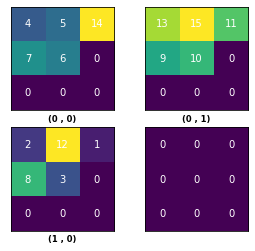

In [5]:

############################################################################################
# Name: Junkyu Kwon
# File: plotPart function
# email: junkyuk1@umbc.edu
# This function sorts the given partition using how close each partitions are, 
# and creates plots using given partition, number of axis, and number of subplots. 
#
############################################################################################

import numpy as np
import matplotlib.pyplot as plt

def plotPart(partition, edges, partitionAxis, partitionNum): 
    #partitionAxis = n x n matrix for each partition, edges = list of edges and weights, partitioNum = number of partition blocks
    
    #Copy the partition, and convert it into list of its keys
    tempPartition = partition;
    #print(list(tempPartition[0].keys()))
    tempData = [0]*len(partition)
    
    for i in range(0, int(len(tempPartition))):
        tempPar = list(tempPartition[i].keys())
        tempData[i] = tempPar
    print(tempData)
    
    #Sort the partition in terms of how close to the (0,0)
    for i in range(1, int(len(tempData)-1)):
        if totalweight(tempData[0],tempData[i],edges) > totalweight(tempData[0],tempData[i+1],edges):
            tempData[i], tempData[i+1] = tempData[i+1], tempData[i]
    print(tempData)
    
    #Setup the number of subgraphs
    if partitionNum < np.sqrt(len(tempPartition)):
        print("Given number of partition is too small")
    else:
        numPart = partitionNum
    
    #Setup the number of each partitions
    if partitionAxis < np.sqrt(len(tempPartition[0])):
        print("Given number of axis is too small")
    else:
        lenAxis = partitionAxis
        
    #Plug 0 to make complete square matrix n^2
    for i in range(0, int(len(tempData))):
        if len(tempData[i]) < lenAxis**2:
            for j in range(0, int(lenAxis**2-len(tempData[i]))):
                tempData[i].append(0)
    print(tempData)
    #Setup final parts
    fig, axs = plt.subplots(numPart, numPart)
    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.65, top=0.9, wspace=0.3, hspace=0.1)
    
    #Plug 0 for empty lists
    numAppend = numPart**2 - len(tempData)
    zeros = [0]*(lenAxis**2)
    for i in range(0, numAppend):
        tempData.append(zeros)
    
    print(tempData)
    
    counter = 0
    
    for i in range(0, numPart):
        for j in range(0, numPart):
            data = np.array(tempData[counter]).reshape(lenAxis, lenAxis)
            axs[i, j].imshow(data)
            
            #Show node annotation 
            for a in range(0, lenAxis):
                for b in range(0, lenAxis):
                    text = axs[i,j].text(b, a, data[a, b], ha="center", va="center", color="w")
                    
            #Show coordinates
            if data[i, j] != 0:
                txt = '('+ str(i) +' , '+ str(j) +')'
                axs[i,j].set_xlabel(txt, fontsize='small', fontweight='bold')
                
            #remove texts
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
            
            #Add counter
            counter+=1
    
    return 0;

#Test it!
plotPart(FinalPartition, g15ed, 3, 2)



Generated graph is: 
{1: [9], 2: [11, 13, 6], 3: [41, 27, 23, 43, 14], 4: [33, 38, 46], 5: [], 6: [46, 2, 22], 7: [46], 8: [], 9: [49, 1, 33], 10: [33, 33], 11: [2, 42], 12: [40, 49, 46], 13: [44, 2, 17], 14: [50, 21, 3], 15: [50, 25, 49], 16: [47, 23, 32], 17: [13], 18: [], 19: [36], 20: [], 21: [40, 14], 22: [6], 23: [16, 3], 24: [32, 32], 25: [15], 26: [50], 27: [3], 28: [46, 39, 29], 29: [28], 30: [], 31: [36], 32: [44, 16, 24, 24], 33: [49, 50, 4, 10, 10, 45, 9], 34: [], 35: [], 36: [19, 31], 37: [], 38: [4], 39: [28], 40: [21, 12], 41: [3], 42: [11, 46], 43: [3, 46], 44: [13, 32], 45: [33], 46: [28, 7, 6, 42, 43, 12, 4], 47: [16, 49], 48: [], 49: [33, 9, 15, 47, 12], 50: [15, 14, 33, 26]}
Generated edges are: 
[[28, 46, 5], [41, 3, 9], [7, 46, 11], [44, 13, 9], [2, 11, 1], [47, 16, 4], [36, 19, 1], [50, 15, 6], [14, 50, 2], [33, 49, 11], [15, 25, 10], [32, 44, 6], [6, 46, 1], [11, 42, 3], [50, 33, 6], [21, 40, 7], [16, 23, 10], [32, 16, 6], [42, 46, 5], [4, 33, 4], [3, 27, 7], [1

0

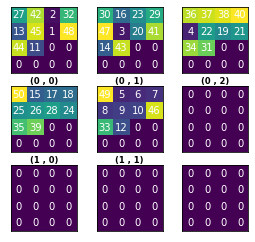

In [6]:
#Graph generator tester
g_graph, g_edges = GraphGen(50)

print("Generated graph is: ")
print(g_graph)

print("Generated edges are: ")
print(g_edges)

#Test the partitioning function with large graph
part100 = MulKL(10,g_graph, g_edges,10)

plotPart(part100, g_edges, 4, 3)

In [7]:
import networkx as nx

g=nx.gnm_random_graph(5,5)

print(g)